<a href="https://colab.research.google.com/github/kellianneyang/bootcamp-assignments/blob/main/Find_Average_Height_per_Individual_Olympian_Per_Year_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Kellianne Yang

# **Find Average Height per Individual Olympian Per Year Exercise (Core)**

## Learning Objectives:


- Demonstrate proficiency in manipulating a dataset on Olympic athletes.



## Understanding the Dataset


There is a dataset on Kaggle called [120 years of Olympic history](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). This is a historical dataset on the modern Olympic Games, from Athens 1896 to Rio 2016. This data was originally web-scraped from [www.sports-reference.com](http://www.sports-reference.com/) in May 2018 by an R programmer (the code used to [scrape and organize the data is on GitHub](https://github.com/rgriff23/Olympic_history/blob/master/R/olympics%20wrangle.R)). Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four-year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.



The dataset [here](https://drive.google.com/file/d/1SrEVf2bzs_K_tr83C3Fs7Tu1v-fuEW72/view?usp=sharing) is a randomly sampled subset of that dataset containing roughly 15% of the original people in the dataset (a person is given a unique ID). The sample data below in the image below is filtered to show all of the data for one athlete (ID 29686) who participated in multiple events for two different Olympic games.



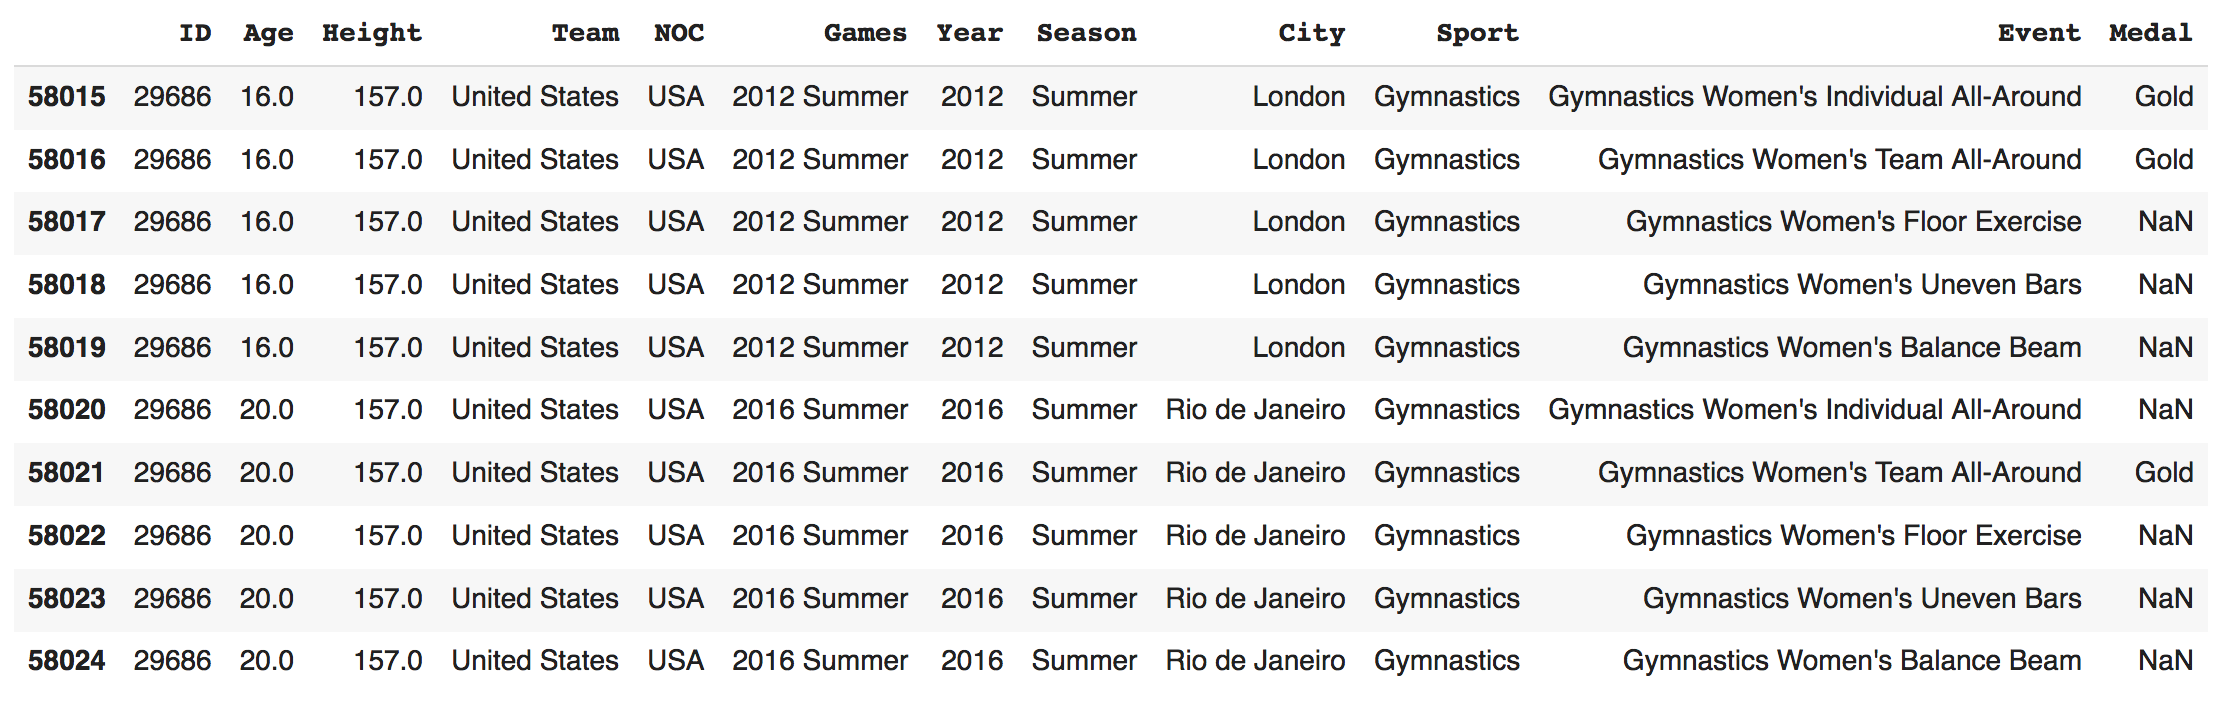

## Task

Load this dataset and explore it!

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import pandas as pd

In [ ]:
# load dataset with header
filename = '/content/athleteEventsNoPersonal.csv'
df = pd.read_csv(filename)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40616 entries, 0 to 40615
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      40616 non-null  int64  
 1   Age     39143 non-null  float64
 2   Height  31615 non-null  float64
 3   Team    40616 non-null  object 
 4   NOC     40616 non-null  object 
 5   Games   40616 non-null  object 
 6   Year    40616 non-null  int64  
 7   Season  40616 non-null  object 
 8   City    40616 non-null  object 
 9   Sport   40616 non-null  object 
 10  Event   40616 non-null  object 
 11  Medal   5917 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


1. Answer the following questions:
  1. How many rows? **40,616**
  2. How many columns? **12**

In [ ]:
# get rows and columns with df.shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset.")

There are 40616 rows and 12 columns in this dataset.


1. Answer the following questions:
  3. Which columns have missing values? (Why do you think there are there so many null values in the Medals column?)

**'Age', 'Height', and 'Medals' are missing values.**

**'Medals probably has so many null values because a majority of athletes in any given event do not win a medal.**

In [ ]:
# get null values per column with .isna().sum()
df.isna().sum()

ID            0
Age        1473
Height     9001
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     34699
dtype: int64

In [ ]:
# Age missing values
# find same person (via ID) in other rows to fill in missing Age

# loop through all the rows in the df
for index in df.index:

  # create a filter for only people whose ID matches that of the current row
  id_filter = df['ID'] == df.loc[index, 'ID']

  # calculate the mean age of the people in the filter
  mean_age = df.loc[id_filter, 'Age'].mean()

  # assign the mean_age to the Age column in this row
  df.loc[index, 'Age'] = mean_age



In [ ]:
# check if any missing ages were filled in
df.isna().sum()

ID            0
Age        1473
Height     9001
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     34699
dtype: int64

In [ ]:
# that didn't reduce the number of missing ages, which means that there are no people in the dataset
# that have their age filled out in one row but missing in another row

In [ ]:
# Height missing values
# find same person (via ID) in other rows to fill in missing Height

# loop through all the rows in the df
for index in df.index:

  # create a filter for only people whose ID matches that of the current row
  id_filter = df['ID'] == df.loc[index, 'ID']

  # calculate the mean age of the people in the filter
  mean_height = df.loc[id_filter, 'Height'].mean()

  # assign the mean_height to the Height column in this row
  df.loc[index, 'Height'] = mean_height



In [ ]:
# check if any missing heights were filled in
df.isna().sum()

ID            0
Age        1473
Height     9001
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     34699
dtype: int64

In [ ]:
# that didn't reduce the number of missing heights, which means that there are no people in the dataset
# that have their height filled out in one row but missing in another row

1. Answer the following questions: 
  4. How many entries correspond to the city of London? **3,370**

In [ ]:
# create filter and apply to df
london_filter = df['City'] == 'London'
london_df = df[london_filter]

# use len() to get number of rows
print(f"There are {len(london_df)} rows that correspond to the city of London.")

There are 3370 rows that correspond to the city of London.


In [ ]:
london_filter = df['City'] == 'London'
london_filter

0        False
1        False
2        False
3        False
4        False
         ...  
40611    False
40612    False
40613    False
40614    False
40615    False
Name: City, Length: 40616, dtype: bool

In [ ]:
len(london_filter)

40616

In [ ]:
london_df = df[london_filter]
london_df

ID        Age  Height     Team  NOC        Games  Year  Season  \
36         54        NaN     NaN     Iran  IRI  1948 Summer  1948  Summer   
42         67  25.000000   179.0   Russia  RUS  2012 Summer  2012  Summer   
66        155  30.148148   185.0    Egypt  EGY  2012 Summer  2012  Summer   
69        159  17.370370   167.0    Egypt  EGY  2012 Summer  2012  Summer   
72        185  32.600000     NaN    Egypt  EGY  1948 Summer  1948  Summer   
...       ...        ...     ...      ...  ...          ...   ...     ...   
40577  135489  23.652187   182.0   Russia  RUS  2012 Summer  2012  Summer   
40578  135489  23.835764   182.0   Russia  RUS  2012 Summer  2012  Summer   
40590  135517  22.000000     NaN  Austria  AUT  1948 Summer  1948  Summer   
40595  135528  29.333333   181.0  Germany  GER  2012 Summer  2012  Summer   
40609  135558  32.000000   200.0   Poland  POL  2012 Summer  2012  Summer   

         City                  Sport  \
36     London                 Boxing   
42     London              Athletics   
66     London              Wrestling   
69     London  Synchronized Swimming   
72     London                Fencing   
...       ...                    ...   
40577  London               Swimming   
40578  London               Swimming   
40590  London               Swimming   
40595  London              Badminton   
40609  London             Volleyball   

                                              Event   Medal  
36                         Boxing Men's Heavyweight     NaN  
42                  Athletics Women's Javelin Throw     NaN  
66         Wrestling Men's Heavyweight, Greco-Roman     NaN  
69               Synchronized Swimming Women's Team     NaN  
72                   Fencing Men's Foil, Individual     NaN  
...                                             ...     ...  
40577        Swimming Women's 200 metres Backstroke  Silver  
40578  Swimming Women's 4 x 100 metres Medley Relay     NaN  
40590          Swimming Men's 100 metres Backstroke     NaN  
40595                       Badminton Men's Singles     NaN  
40609                   Volleyball Men's Volleyball     NaN  

[3370 rows x 12 columns]

In [ ]:
# alternate way to get number of rows that correspond to 'London'
london_rows = df['City'].value_counts()['London']
print(f"There are {london_rows} rows that correspond to the city of London.")

There are 3370 rows that correspond to the city of London.


1. Answer the following questions: 
  5. What age is the youngest athlete in our sample data? Hint: use min() **11**

In [ ]:
# use .min() on 'Age' column
print(f"The youngest athlete in the sample data is {df['Age'].min()} years old.")

The youngest athlete in the sample data is 11.0 years old.


2. Create filters to find out:
  1. How many athletes who participated in the Sport "Tug-Of-War" were from Team "Sweden" in our sample dataset? **6**

In [ ]:
# create a filter for Tug-Of-War athletes
tug_filter = df['Sport'] == 'Tug-Of-War'

In [ ]:
# create a separate filter for athletes from Sweden
sweden_filter = df['Team'] == 'Sweden'

In [ ]:
# apply filters to dataset
filtered_df = df[tug_filter & sweden_filter]

In [ ]:
# find length of dataset
len(filtered_df)

6

In [ ]:
# check if there are any duplicate names in case the same athlete competed more than once
filtered_df['ID'].nunique()

6

In [ ]:
# number of IDs match number of athletes, so each athlete probably competed once

print(f"{len(filtered_df)} athletes competed in Tug-of-War for Sweden.")

6 athletes competed in Tug-of-War for Sweden.


2. Create filters to find out:
  2. How many Gold medals were awarded to athletes who were over 40 years old? **66**

In [ ]:
# create a filter for Gold medal athletes
gold_filter = df['Medal'] == 'Gold'

In [ ]:
# create a separate filter for athletes over 40
forty_filter = df['Age'] > 40

In [ ]:
# apply filters to dataset
filtered_df2 = df[gold_filter & forty_filter]

In [ ]:
# find length of dataset
print(f"There were {len(filtered_df2)} gold medals awarded to athletes who were over 40 years old.")

There were 93 gold medals awarded to athletes who were over 40 years old.


3. Determine the average height if:
  1. All rows are included. **175.38**


In [ ]:
print(f"The average height if all athletes in the data are included is {round(df['Height'].mean(), 2)}.")

The average height if all athletes in the data are included is 175.38.


3. Determine the average height if:
  2. All rows are included but grouped by Event.

In [ ]:
# use grouby to look at average height by event
height_by_event = df.groupby('Event')['Height'].mean()
height_by_event

Event
Alpine Skiing Men's Combined                      178.547170
Alpine Skiing Men's Downhill                      178.211679
Alpine Skiing Men's Giant Slalom                  176.739394
Alpine Skiing Men's Slalom                        176.482143
Alpine Skiing Men's Super G                       179.850575
                                                     ...    
Wrestling Women's Flyweight, Freestyle            158.100000
Wrestling Women's Heavyweight, Freestyle          173.444444
Wrestling Women's Light-Heavyweight, Freestyle    170.000000
Wrestling Women's Lightweight, Freestyle          162.666667
Wrestling Women's Middleweight, Freestyle         164.533333
Name: Height, Length: 726, dtype: float64

In [ ]:
# check out some descriptive statistics
height_by_event.describe()

count    575.000000
mean     174.025140
std        7.927221
min      142.000000
25%      168.000000
50%      175.142857
75%      179.197554
max      195.803191
Name: Height, dtype: float64

3. Determine the average height if:
  3. Bonus: This dataset contains many athletes more than once (if they competed in multiple events and/or multiple years). You can confirm this by finding .value_counts on the ID column! For the bonus task, we want to get the average height of all the athletes, but don't want to include any athlete more than once. Hint: We learned how to drop duplicates if EVERY column was identical, but now we want to drop a row any time just the ID is repeated. To do this, you can use a subset of your data as an argument in the drop_duplicates function. You can also tell Python which of the duplicates to keep by using the keep argument.

```
# Because I don't want to drop all of these values permanently from my df, 
# I assign this as a new dataframe that I called "one_per_athlete"
one_per_athlete = df.drop_duplicates(subset = 'Column_Name', keep = 'first')
```
**176.32**

In [ ]:
df['ID'].value_counts()

119591    36
44875     32
76437     31
133279    30
21462     29
          ..
78467      1
78468      1
78470      1
78474      1
91368      1
Name: ID, Length: 20336, dtype: int64

In [ ]:
# make new df that has only one row for each athlete
one_per_athlete_df = df.drop_duplicates(subset = 'ID', keep = 'first')

In [ ]:
# check number of rows in the new df
print(f"There are {one_per_athlete_df.shape[0]} rows in the new dataframe, compared to {df.shape[0]} rows in the original dataframe.")

There are 20336 rows in the new dataframe, compared to 40616 rows in the original dataframe.


In [ ]:
print(f"The average height of all athletes, counting each athlete only once, is {round(one_per_athlete_df['Height'].mean(), 2)}.")

The average height of all athletes, counting each athlete only once, is 176.32.


Turn in your code that accomplishes this task!

